In [1]:
from yt_xarray import transformations
from yt_xarray.sample_data import load_random_xr_data
import numpy as np 

fields = {
        "field0": ("radius", "latitude", "longitude"),
    }
dims = {
    "radius": (2000, 5000, 32),
    "latitude": (10, 50, 32),
    "longitude": (10, 50, 22),
}
ds = load_random_xr_data(fields, dims)
ds_yt = transformations.build_interpolated_cartesian_ds(
    ds,
    [
        "field0",
    ],
    "radius",
)
ad = ds_yt.all_data()
mn = np.nanmin(ad[("stream", "field0")])
mx = np.nanmax(ad[("stream", "field0")])
mn, mx

yt : [INFO     ] 2024-02-01 12:22:25,364 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-02-01 12:22:25,364 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2024-02-01 12:22:25,365 Parameters: domain_left_edge          = [826.35182233 223.2377941  347.29635533]
yt : [INFO     ] 2024-02-01 12:22:25,365 Parameters: domain_right_edge         = [4849.23155196 3772.03253368 3830.22221559]
yt : [INFO     ] 2024-02-01 12:22:25,366 Parameters: cosmological_simulation   = 0


(unyt_quantity(6.6179308e-05, '(dimensionless)'),
 unyt_quantity(0.99987255, '(dimensionless)'))

In [6]:
import napari 
from yt_napari.viewer import Scene

v = napari.viewer.Viewer()
yt_scene = Scene()

yt : [INFO     ] 2024-02-01 12:23:25,646 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-02-01 12:23:25,647 Parameters: domain_dimensions         = [100 100 100]
yt : [INFO     ] 2024-02-01 12:23:25,647 Parameters: domain_left_edge          = [-6316.89878819 -6318.14790739 -6320.04541016]
yt : [INFO     ] 2024-02-01 12:23:25,648 Parameters: domain_right_edge         = [6319.08283663 6318.14790739 6320.04541016]
yt : [INFO     ] 2024-02-01 12:23:25,648 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-02-01 12:23:25,825 xlim = -6316.898788 6319.082837
yt : [INFO     ] 2024-02-01 12:23:25,826 ylim = -6318.147907 6318.147907
yt : [INFO     ] 2024-02-01 12:23:25,827 xlim = -6316.898788 6319.082837
yt : [INFO     ] 2024-02-01 12:23:25,828 ylim = -6318.147907 6318.147907
yt : [INFO     ] 2024-02-01 12:23:25,830 Making a fixed resolution buffer of (('stream', 'mp')) 800 by 800



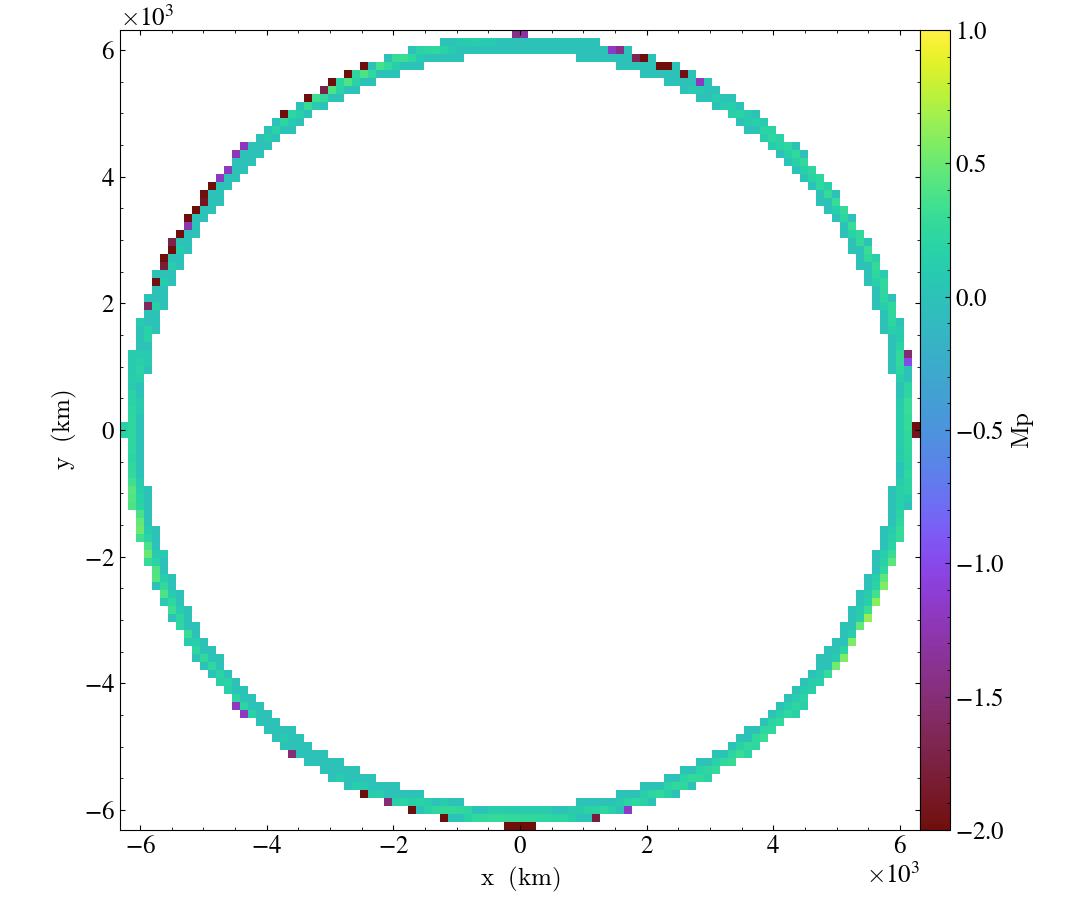

In [7]:
# globa dataset. upper mantle only, need high res to resolve ring
ds = yt_xarray.open_dataset("IRIS/DBRD-NATURE2020-depth.nc")
yt_ds = transformations.build_interpolated_cartesian_ds(ds, ('mp',), 'depth', length_unit='km', grid_resolution=(100, 100, 100))
slc = yt.SlicePlot(yt_ds, "z", ('stream', 'mp'))
slc.set_log(('stream', 'mp'), False)
slc.set_zlim(('stream', 'mp'), -2, 1)


In [8]:
yt_scene.add_region(v, yt_ds, ('stream', 'mp'), resolution=(100,100,100), take_log=False)

yt : [INFO     ] 2024-02-01 12:23:35,196 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-02-01 12:23:35,196 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2024-02-01 12:23:35,197 Parameters: domain_left_edge          = [-3270.58997457 -5572.16035983  2533.15649414]
yt : [INFO     ] 2024-02-01 12:23:35,198 Parameters: domain_right_edge         = [ -334.456655   -2832.0119792   4869.72851562]
yt : [INFO     ] 2024-02-01 12:23:35,199 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-02-01 12:23:35,317 xlim = -3270.589975 -334.456655
yt : [INFO     ] 2024-02-01 12:23:35,318 ylim = -5572.160360 -2832.011979
yt : [INFO     ] 2024-02-01 12:23:35,319 xlim = -3270.589975 -334.456655
yt : [INFO     ] 2024-02-01 12:23:35,320 ylim = -5572.160360 -2832.011979
yt : [INFO     ] 2024-02-01 12:23:35,322 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800



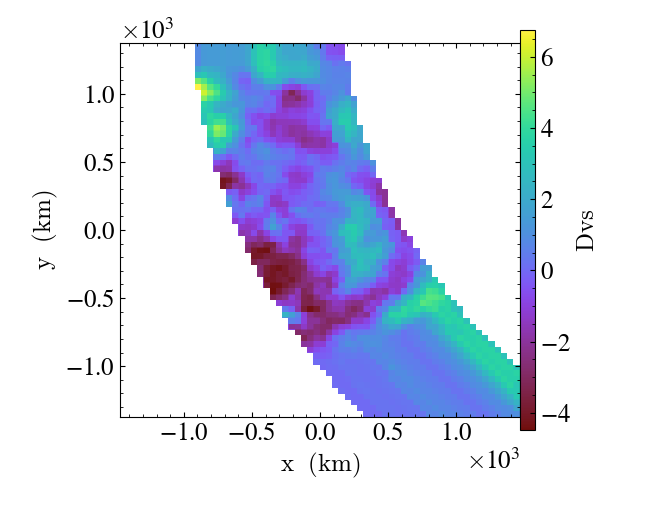

In [9]:
import xarray as xr
import yt_xarray
import yt
from yt_xarray import transformations

ds = yt_xarray.open_dataset("IRIS/wUS-SH-2010_percent.nc")
ds_yt = transformations.build_interpolated_cartesian_ds(
    ds,
    [
        "dvs",
    ],
    "depth",
)
slc = yt.SlicePlot(ds_yt,'z', ('stream', 'dvs'), window_size=(4,4))
slc.set_log(("stream", "dvs"), False)

In [10]:
import xarray as xr
import yt_xarray
import yt
from yt_xarray import transformations
import numpy as np 



ds = yt_xarray.open_dataset("IRIS/wUS-SH-2010_percent.nc")
interp_res = (100,100,100)
ds_yt = transformations.build_interpolated_cartesian_ds(
    ds,
    [
        "dvs",
    ],
    "depth", 
    grid_resolution=interp_res,
)

def _slow_vels(field, data):
    # return negative velocities only, 0 all other elements
    dvs = data['dvs'].copy()
    dvs[np.isnan(dvs)] = 0.0
    dvs[dvs>0] = 0.0
    return np.abs(dvs)

def _fast_vels(field, data):
    # return fast velocities only, 0 all other elements
    dvs = data['dvs'].copy()
    dvs[np.isnan(dvs)] = 0.0
    dvs[dvs<0] = 0.0
    return np.abs(dvs)

ds_yt.add_field(    
    name=("stream", "slow_dvs"),
    function=_slow_vels,
    sampling_type="local",
)

ds_yt.add_field(    
    name=("stream", "fast_dvs"),
    function=_fast_vels,
    sampling_type="local",    
)
min_max = ds_yt.all_data().quantities.extrema(('stream', 'slow_dvs')).d
min_max

yt : [INFO     ] 2024-02-01 12:23:42,906 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-02-01 12:23:42,907 Parameters: domain_dimensions         = [100 100 100]
yt : [INFO     ] 2024-02-01 12:23:42,907 Parameters: domain_left_edge          = [-3270.58997457 -5572.16035983  2533.15649414]
yt : [INFO     ] 2024-02-01 12:23:42,908 Parameters: domain_right_edge         = [ -334.456655   -2832.0119792   4869.72851562]
yt : [INFO     ] 2024-02-01 12:23:42,909 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-02-01 12:23:43,157 Field ('stream', 'slow_dvs') was added without specifying units or dimensions, auto setting units to 'dimensionless'


array([ 0.        , 13.05000019])

In [13]:
yt_scene.add_region(v, ds_yt, 
                    ("stream", "slow_dvs"), 
                    resolution=interp_res, 
                    take_log=False, 
                    contrast_limits=min_max,
                    colormap='magma')
# v.dims.ndisplay = 3 # switch to 3d display